In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
income=np.array([10,12,15,19,23,32,44])
age=np.array([24,26,27,29,35,36,38])
df1=pd.DataFrame(income)
df2=pd.DataFrame(age)


In [3]:
df=pd.concat([df1,df2],axis=1)
df.columns=['income(actual)','age']
df

,income(actual),age
0,10,24
1,12,26
2,15,27
3,19,29
4,23,35
5,32,36
6,44,38


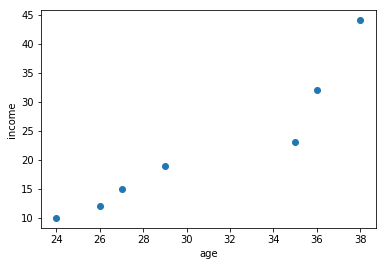

In [4]:
plt.scatter(df['age'],df['income(actual)'])
plt.xlabel('age')
plt.ylabel('income')
plt.show()

In [5]:
avg=df1.mean()
#tss=sum((df1-avg)**2)
tss=((df1-avg)**2).sum()
tss

0    886.857143
dtype: float64

In [6]:
from sklearn.linear_model import LinearRegression

In [8]:
linreg=LinearRegression() #prepare LR object
linreg.fit(pd.DataFrame(df['age']),df['income(actual)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
linreg.intercept_ #intercept of line or B1

-40.864485981308434

In [10]:
linreg.coef_ #gives B0

array([2.05140187])

Equation of line is -40.86+2.05*age 

In [11]:
'''to get prediction on values of age
use the above equation and multiply the values of age with B0 and B1      like this y-predicted=B1+B0*age
or alternatively we can use the below one'''
df['income(predicted)']=linreg.predict(pd.DataFrame(df['age'])) #its the predicted value

In [12]:
df

,income(actual),age,income(predicted)
0,10,24,8.369159
1,12,26,12.471963
2,15,27,14.523364
3,19,29,18.626168
4,23,35,30.934579
5,32,36,32.985981
6,44,38,37.088785


In [13]:
sse=((df['income(actual)']-df['income(predicted)'])**2).sum()
sse

114.94392523364485

In [14]:
r2=1-(sse/tss)
r2

0    0.870392
dtype: float64

In [15]:
l=len(df)
mape=((abs(df['income(actual)']-df['income(predicted)'])/df['income(actual)']).sum())/l #to calculate mape 
mape # hence the mape value in % is 11.23%

0.11239029793231935

In [16]:
rmse=(sse/len(df))**.5
rmse

4.0522291084862845

In [17]:
usa=pd.read_csv('USA_Housing.csv')

In [18]:
usa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [19]:
usa.rename(columns={'Avg. Area Income':'avg. income'},inplace=True)
usa.head()

,avg. income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


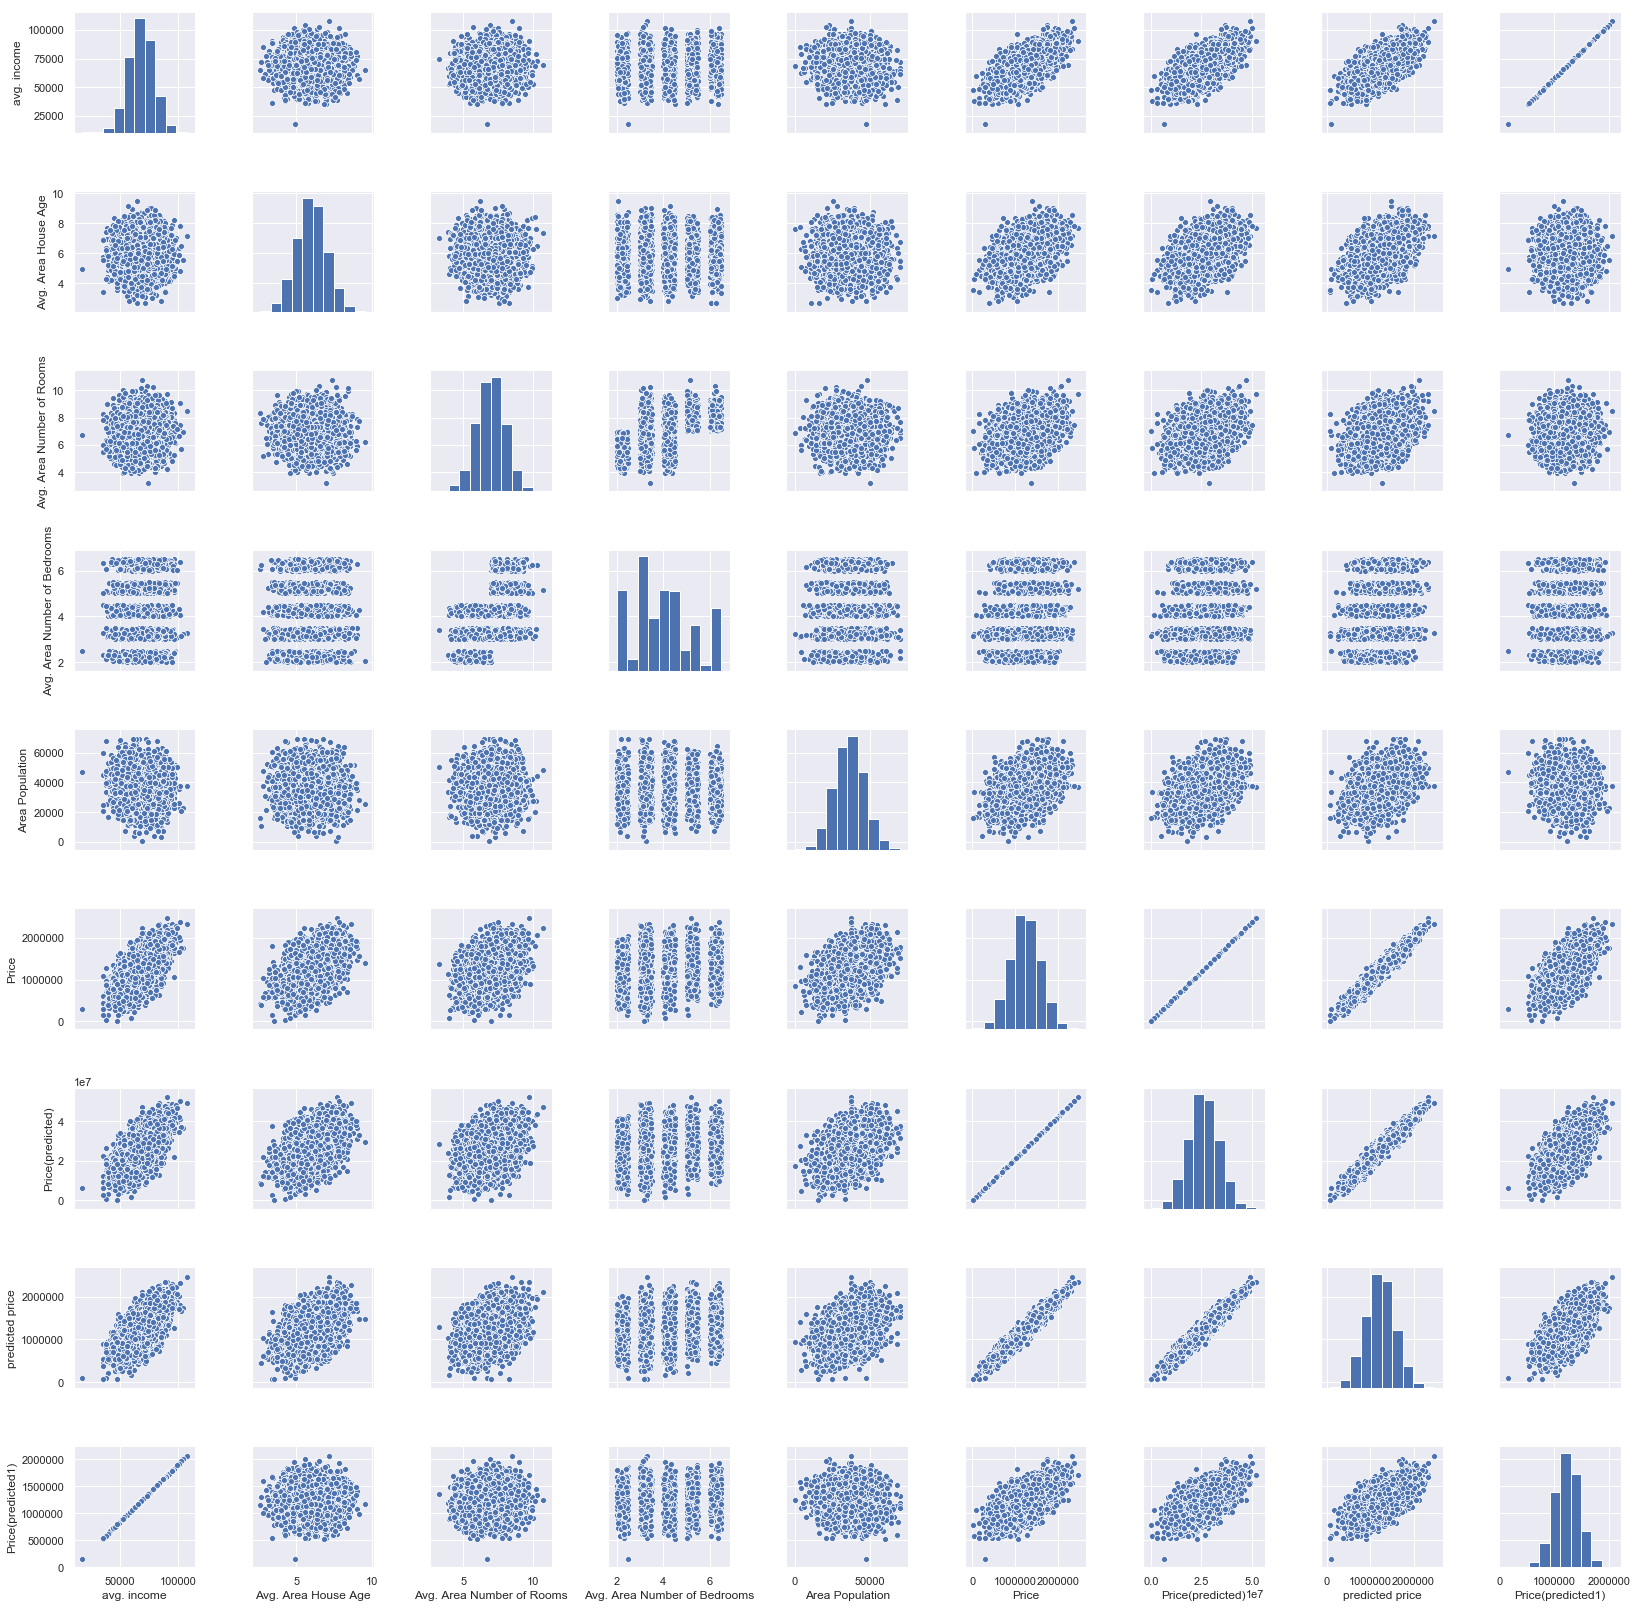

In [104]:
sns.pairplot(usa)

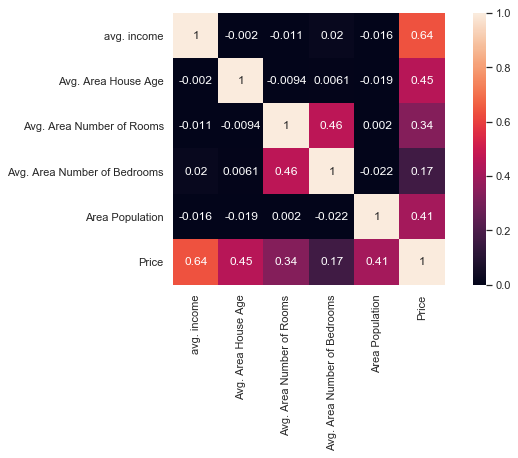

In [35]:
corrmat=usa.corr()
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(corrmat,vmin=0,vmax=1,square=True,annot=True)
plt.show()

dependent variable has high correlation with avg income so considering only avg income

In [95]:
linreg2=LinearRegression() #prepare LR object
linreg2.fit(pd.DataFrame(usa['avg. income']),usa['Price'])
linreg2.fit

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [76]:
b1=linreg2.intercept_
b1

-221579.47820591787

In [77]:
b0=linreg2.coef_
b0

array([21.19548317])

In [90]:
tss2=sum((usa['Price']-np.mean(usa['Price']))**2)
tss2

623335598953005.4

In [98]:
usa['Price(predicted1)']=linreg2.predict(pd.DataFrame(usa['avg. income']))
usa.head()

,avg. income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Price(predicted),predicted price,Price(predicted1)
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",2.222515e+07,1.223847e+06,1.464425e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",3.169651e+07,1.494938e+06,1.458134e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",2.222418e+07,1.253017e+06,1.077430e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,2.649780e+07,1.121224e+06,1.121053e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,1.315157e+07,8.453888e+05,1.049772e+06


In [99]:
sse1=np.sum((usa['Price']-usa['Price(predicted1)'])**2)
sse1

368229703675947.1

In [100]:
r22=1-(sse1/tss2)
r22

0.40925930703388436

# for all columns on dependent variable

In [55]:
linreg1=LinearRegression() #prepare LR object
linreg1.fit(usa.iloc[:,[0,1,2,3,4]],usa['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
usa['predicted price']=linreg1.predict(usa.iloc[:,[0,1,2,3,4]]) #make sure we are predicting using the right columns 
usa.head()

,avg. income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Price(predicted),predicted price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",2.222515e+07,1.223847e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",3.169651e+07,1.494938e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",2.222418e+07,1.253017e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,2.649780e+07,1.121224e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,1.315157e+07,8.453888e+05


In [66]:
tsse=sum((usa['Price']-np.mean(usa['Price']))**2)
tsse

623335598953005.4

In [67]:
ssee=((usa['Price']-usa['predicted price'])**2).sum()
ssee

51098671566265.02

In [69]:
RR22=1-(ssee/tsse)
RR22

0.9180238195089553

In [102]:
l1=len(usa)
mape2=((abs(usa['Price']-usa['predicted price'])/usa['Price']).sum())/l1 #to calculate mape 
mape2

0.07624185208181676

# dummy variable

assigning based on categorical data